# Monte Carlo Simulations

**Name:** Bowen Chen

**Section:** 1

**Date:** Jan 23, 2018 

In [1]:
# python set up
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm 
import numpy as np

###  Question 1

Generate a series ($X_i$, $Y_i$) for i = 1,...,n of Bivariate-Normally distributed random vectors, with the
mean vector of (0,0) and the variance – covariance matrix of $\begin{pmatrix} 
1 & a \\
a & 1 
\end{pmatrix}$. Compute the following by simulation: 

$$\rho = \frac{\frac{1}{n-1}\sum^{n}_{i=1}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\frac{1}{n-1} \sum{(X_i - \bar{X})^2}}\sqrt{\frac{1}{n-1} \sum{(Y_i - \bar{Y})^2}}}$$

Take n = 1000 and a = −0.7

**Solution**:

To simulate bivariate normal distributions, we first need to simulate 2 independent random normals. To accomplish that, we will start will simulating independent uniform random numbers.

Use Box-Muller Algorithm, the two independent random normals could be obtained

Obtain two sequences of 1000 random draws from U[0, 1] by dividing the sequence  $X_n$  by m, name the sequence U

Divide both whole sequences by $2^{31}$ - 1, scale the sequence to U [0, 1], store the generated uniform random numbers in U1 and U2

Assume {$U_i^2$} ~ i.i.d $U[0, 1]$, define 


\begin{equation*}
       \begin{cases}
            Z_1 = \sqrt{-2 ln(U_1)} cos(2\pi U_2)\\
            Z_2 = \sqrt{-2 ln(U_1)} sin(2\pi U_2)\\
         \end{cases}
\end{equation*}

$Z_1$ and $Z_2$ will be two independent standard normal N [0 , 1] distributions 


In [2]:
def generate_random_sequence(seed, n):
    """
        Generate the random sequence Xi whose range is 0 to (2^31 - 1)
    """
    rand_sequence = [seed]
    for i in range(1, n + 1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1))
        
    return rand_sequence[1:]

In [3]:
def generate_normal(seed, n):
    """
        Generate a sequence of N(0, 1) pairs
    """
    rand = generate_random_sequence(seed, n * 2)
    
    # construct uniform random samples from the random sequence above
    U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand[:n]))
    U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand[n:]))

    # define X, Y with the uniform random numbers U1 and U2
    Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.cos(2*m.pi*u2), U1, U2))
    Z2 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))
    
    return Z1,Z2

In [4]:
# define Z1, Z2 with the uniform random numbers U1 and U2
Z1, Z2 = generate_normal(7, 10000)

Given the covariance between $Z_1$ and $Z_2$ as -0.7, variance along each axis is 1, we could know that the correlation between $Z_1$ and $Z_2$ is also -0.7. 

$\begin{pmatrix} 
x  \\
y 
\end{pmatrix}$ = $\begin{pmatrix} 
\mu_1 + \sigma_1 Z_1 \\
\mu_2+  + \rho\sigma_2 Z_1 + \sqrt{1 - \rho^2}\sigma_2 Z_2 
\end{pmatrix}$ 

where $\mu_1$ = $\mu_2$ = 0, $\sigma_1$ = $\sigma_2$ = 1, $\rho$ = -0.7

In [5]:
# Define parameters
mu1 = mu2 = 0
sigma1 = sigma2 = 1
corr = - 0.7

In [6]:
# Generate x and y sequence by mapping the corresponding function onto Z1, Z2 (only choose 1000)
x = list(map(lambda z1: mu1 + z1 * sigma1, Z1[:1000]))
y = list(map(lambda z1, z2: mu2 + corr * sigma2 * z1 + 
             m.sqrt(1 - corr**2) * sigma2 * z2, Z1[:1000], Z2[:1000]))

With the multi-variate normal generated, we could find the correlation $\rho = \frac{\frac{1}{n-1}\sum^{n}_{i=1}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\frac{1}{n-1} \sum{(X_i - \bar{X})^2}}\sqrt{\frac{1}{n-1} \sum{(Y_i - \bar{Y})^2}}}$ by the following

Find the mean for both X and Y

In [7]:
mean_x = sum(x)/len(x)
mean_y = sum(y)/len(y)

Calculate the emprical correlation from the data

In [8]:
# find the numerator of the correlation
cov = sum(map(lambda x, y: (x - mean_x)*(y - mean_y), x, y))/(len(x) - 1)

In [9]:
# find the denominator of correlation
sd_x = m.sqrt(sum(map(lambda x: (x - mean_x)**2, x))/len(x))
sd_y = m.sqrt(sum(map(lambda y: (y - mean_y)**2, y))/len(y))

The default correlation is -0.7, the emprical correlation should be very close to -0.7, which it is (-0.694)

In [10]:
corr = cov/(sd_x*sd_y)
print ('The emprical correlation between X and Y from the simulated bivariate normal: ', round(corr, 6))

The emprical correlation between X and Y from the simulated bivariate normal:  -0.693989


###  Question 2

Evaluate the following expected values by using Monte Carlo simulation:

$$Ε [max(0, X^3 + sin(Y) + X^2Y)]$$

where X and Y have N(0,1) distribution and a correlation of $\rho$ = 0.6


** Solution **:

Start with simulating 10,000 samples from $Z_1$ and $Z_2$ independent random normals N(0, 1), following the same steps as Question 1

Generate X, Y with correlation of 0.6

In [11]:
# Define parameters
mu1 = mu2 = 0
sigma1 = sigma2 = 1
corr = 0.6

In [12]:
X = list(map(lambda z1: mu1 + z1 * sigma1, Z1))
Y = list(map(lambda z1, z2: mu2 + corr * sigma2 * z1 
             + m.sqrt(1 - corr**2) * sigma2 * z2, Z1, Z2))

Define function h(X, Y), where $ h(X, Y) = max(0, X^3 + sin(Y) + X^2Y)$, evaluate each h(x,y) with the simulated 10,000 samples of $(x_i,y_i)$

In [13]:
# define function h(X, Y), map that function to X and Y
h = list(map(lambda x, y: x**3 + m.sin(y) + x**2*y 
             if  x**3 + m.sin(y) + x**2*y > 0
             else 0, 
             X, Y))

Find the emprical expectation of the 10,000 simulated value for $ h(X, Y) = max(0, X^3 + sin(Y) + X^2Y)$, which gives the value of the expectation $Ε [max(0,  X^3 + sin(Y) + X^2Y)]$

In [14]:
E = sum(h)/len(h)
print('The estimated value the expecation is: ', round(E, 5))

The estimated value the expecation is:  1.5406


### Question 3

(a) Estimate the following expected values by simulation: 
* $E_1 = E\bigg(W_5^2 + sin(W_5)\bigg)$  

* $E_2 = E \bigg(e^{\frac{1}{2} t} cos(W_t)\bigg)$, for *t* = 0.5, 3.2, 6.5 

$W_t$ is a Standard Wiener Process. 

** Solution:**

$E_1 = E\bigg(W_5^2 + sin(W_5)\bigg)$

Since standard Wiener Process $W_t$ follows normal distribution, $N(0, \sqrt{t})$, $W_5$ will have distribution $N(0, \sqrt{5})$

$N(0, \sqrt{5})$ = $\sqrt{5} \cdot N(0, 1)$, where $N(0, 1)$ simulated from the box-muller method described in Question 1. For the purpose of this calculation, the sequence $Z_1$ is reused 

In [15]:
W5 = list(map(lambda z: z* m.sqrt(5), Z1[:5000]))

Define a function $f(W_5) = W_5^2 + sin(W_5)$ and evaluate *f* by mapping on $W_5$

In [16]:
f_W5 = list(map(lambda w: w**2 + m.sin(w), W5))

Find the emprical mean of $f(W_5)$, which gives $ E(W_5^2 + sin(W_5))$  

In [17]:
E1 = sum(f_W5)/len(f_W5)

Find the emprical standard deviation of $f(W_5)$

In [18]:
sd1 = m.sqrt(sum(map(lambda x: (x - E1)**2 , f_W5))/len(f_W5))

* $E \bigg(e^{\frac{1}{2} t} cos(W_t)\bigg)$ , for t = 0.5, 3.2, 6.5 

By the same techniques used to find $E_1$, $W_{0.5}$, $W_{3.2}$ and $W_{6.5}$ could be found by multiplying 0.5, 3.2 and 6.5 to $Z_1$

In [19]:
Wt1 = list(map(lambda z: z* m.sqrt(0.5), Z1[:5000]))
Wt2 = list(map(lambda z: z* m.sqrt(3.2), Z1[:5000]))
Wt3 = list(map(lambda z: z* m.sqrt(6.5), Z1[:5000]))

Define a function $f(t, W_t) = e^\frac{t}{2}cos(W_t)$ and evaluate *f* by mapping on $W_t$ where *t* = 0.5, 3.2, 6.5 

In [20]:
f_Wt1 = list(map(lambda w: m.exp(0.5/2) * m.cos(w), Wt1))
f_Wt2 = list(map(lambda w: m.exp(3.2/2) * m.cos(w), Wt2))
f_Wt3 = list(map(lambda w: m.exp(6.5/2) * m.cos(w), Wt3))

Find the emprical mean of $f(W_t)$, which gives $E (e^\frac{t}{2}cos(W_t))$

In [21]:
E2_t1 = sum(f_Wt1)/len(f_Wt1)
E2_t2 = sum(f_Wt2)/len(f_Wt2)
E2_t3 = sum(f_Wt3)/len(f_Wt3)

Find the empirical standard deviation of $f(W_t)$

In [22]:
sd_t1 = m.sqrt(sum(map(lambda x: (x - E2_t1)**2 , f_Wt1))/len(f_Wt1))
sd_t2 = m.sqrt(sum(map(lambda x: (x - E2_t2)**2 , f_Wt2))/len(f_Wt2))
sd_t3 = m.sqrt(sum(map(lambda x: (x - E2_t3)**2 , f_Wt3))/len(f_Wt3))

(b) How are the values of the last three integrals (for the cases t = 0.5, 3.2, 6.5) related?

**Solution:**

For the expectation value $E_2 = E \bigg(e^{\frac{1}{2} t} cos(W_t)\bigg)$, define a function $f(t, W_t) = e^\frac{t}{2}cos(W_t)$, using Ito's Lemma,

$$ \begin{align}
df(t,W_t) &= \frac{\partial f}{\partial t}dt + \frac{\partial f}{\partial W_t}dW_t + 
\frac{1}{2}\frac{\partial ^2 f}{\partial W_t ^2} (dW_t)^2\\ 
          \\
          &= \frac{1}{2}e^\frac{t}{2}\ cos(W_t)\ dt - e^\frac{t}{2}\ sin(W_t)\ dW_t - 
          \frac{1}{2}e^\frac{t}{2}\ cos(W_t)\ dt\\
          \\
          &= - e^\frac{t}{2}\ sin(W_t)\ dW_t
\end{align} $$

Solving the integral, 

$$ \begin{align}
f(t,W_t) - f(0,W_0) &= \int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s \\
                        \\
e^\frac{t}{2}cos(W_t)- 1 &= \int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s \\
\\
e^\frac{t}{2}cos(W_t) &= 1 + \int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s 
\end{align} $$

Then, the expectation of $f(t, W_t) = e^\frac{t}{2}cos(W_t)$ is

$$ \begin{align}
E\bigg(e^\frac{t}{2}cos(W_t)\bigg) &= E\bigg(1 + \int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s \bigg)  \\
                                    \\
                                   & = 1 + E\bigg(\int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s \bigg) \\
                                   \\
                                   & = 1 
\end{align} $$

since $E\bigg(\int^{t}_{0}- e^\frac{s}{2}\ sin(W_s)\ dW_s \bigg) = 0$

Therefore, we should expect all of the last 3 intergral to be equal to 1, since 
$E \bigg(e^{\frac{1}{2} t} cos(W_t)\bigg) = 1$ for all *t*. 

From the three estimations performed in (a), the estimated values are not exactly close to the theoritical value.

(c) Now use a variance reduction technique to compute the expected values in part (a). Do you see any improvements? Comment.


**Solution:**

Apply the antithetic values as the variance reduction technique,

find normally distributed $X$ that has a negative correlation with $W_t$ (similar to question 2)


In [23]:
corr = - 0.6
X5 = list(map(lambda z1, z2: corr * m.sqrt(5) * z1 
              + m.sqrt(1 - corr**2) * m.sqrt(5) * z2, Z1[:5000], Z2[:5000]))

In [24]:
Xt1 = list(map(lambda z1, z2: corr * m.sqrt(0.5) * z1 
               + m.sqrt(1 - corr**2) * m.sqrt(0.5) * z2, Z1[:5000], Z2[:5000]))

Xt2 = list(map(lambda z1, z2: corr * m.sqrt(3.2) * z1 
               + m.sqrt(1 - corr**2) * m.sqrt(3.2) * z2, Z1[:5000], Z2[:5000]))

Xt3 = list(map(lambda z1, z2: corr * m.sqrt(6.5) * z1 
               + m.sqrt(1 - corr**2) * m.sqrt(6.5) * z2, Z1[:5000], Z2[:5000]))

Evaluate $f(X)$ on $X$

In [25]:
f_X5 = list(map(lambda w: w**2 + m.sin(w), X5))
f_Xt1 = list(map(lambda w: m.exp(0.5/2) * m.cos(w), Xt1))
f_Xt2 = list(map(lambda w: m.exp(3.2/2) * m.cos(w), Xt2))
f_Xt3 = list(map(lambda w: m.exp(6.5/2) * m.cos(w), Xt3))

Define $h(W_t)$ as the average of $f(W_t)$ find $f(X)$, $h(W_t)= \frac{f(W_t) + f(X)}{2}$

In [26]:
h_W5 = list(map(lambda x, y: (x + y)/2, f_W5, f_X5))
h_Wt1 = list(map(lambda x, y: (x + y)/2, f_Wt1, f_Xt1))
h_Wt2 = list(map(lambda x, y: (x + y)/2, f_Wt2, f_Xt2))
h_Wt3 = list(map(lambda x, y: (x + y)/2, f_Wt3, f_Xt3))

Find the emprical mean of f($W_t$) after variance reduction

In [27]:
E1h = sum(h_W5)/len(h_W5)
E2h_t1 = sum(h_Wt1)/len(h_Wt1)
E2h_t2 = sum(h_Wt2)/len(h_Wt2)
E2h_t3 = sum(h_Wt3)/len(h_Wt3)

Find the emprical standard deviation of f($W_t$) after variance reduction

In [28]:
sd_h5 = m.sqrt(sum(map(lambda x: (x - E1h)**2 , h_W5))/len(h_W5))
sd_ht1 = m.sqrt(sum(map(lambda x: (x - E2h_t1)**2 , h_Wt1))/len(h_Wt1))
sd_ht2 = m.sqrt(sum(map(lambda x: (x - E2h_t2)**2 , h_Wt2))/len(h_Wt2))
sd_ht3 = m.sqrt(sum(map(lambda x: (x - E2h_t3)**2 , h_Wt3))/len(h_Wt3))

In [29]:
print('Before variance reduction: \n')
print ('E1[W5]= ', round(E1, 5))
print ('sd1[W(5)] = ', round(sd1, 5))
print('\n')
print ('E2[W(0.5)] = ', round(E2_t1, 5))
print ('sd2[W(0.5)] = ', round(sd_t1, 5))
print('\n')
print ('E2[W(3.2)] = ', round(E2_t2, 5))
print ('sd2[W(3.2)] = ', round(sd_t2, 5))
print('\n')
print ('E2[W(6.5)] = ', round(E2_t3, 5))
print ('sd2E[W(6.5)] = ', round(sd_t3, 5))

Before variance reduction: 

E1[W5]=  5.11719
sd1[W(5)] =  7.31812


E2[W(0.5)] =  0.99427
sd2[W(0.5)] =  0.36314


E2[W(3.2)] =  0.95391
sd2[W(3.2)] =  3.36936


E2[W(6.5)] =  0.77507
sd2E[W(6.5)] =  18.43589


In [30]:
print ('After applying antithetic values, \n')

print ('E1[W(5)] = ', round(E1h, 5))
print ('sd1[W(0.5)] = ', round(sd_h5, 5))
print('\n')

print ('E2[W(0.5)] = ', round(E2h_t1, 5))
print ('sd2[W(0.5)] = ', round(sd_ht1, 5))
print('\n')

print ('E2[W(3.2)] = ', round(E2h_t2, 5))
print ('sd2[W(3.2)] = ', round(sd_ht2, 5))
print('\n')

print ('E2[W(6.5)] = ', round(E2h_t3, 5))
print ('sd2[W(6.5)] = ', round(sd_ht3, 5))

After applying antithetic values, 

E1[W(5)] =  5.08429
sd1[W(0.5)] =  6.07287


E2[W(0.5)] =  0.99688
sd2[W(0.5)] =  0.30002


E2[W(3.2)] =  0.99328
sd2[W(3.2)] =  2.63211


E2[W(6.5)] =  0.87095
sd2[W(6.5)] =  13.45402


**Comment:** There are small improvements on the four integrals we are trying to find, the estimated value is closer to the true value, indicating the simulation is converging faster than before. The standard deviation of the monte carlo simulations are also smaller than they used to be for all expectations. 

### Question 4

Let 𝑆𝑡 be a Geometric Brownian Motion process: : $S_t = S_0 e^{\sigma W_t +(r −\frac{\sigma^2}{2})t}$, where r = 0.04, $\sigma$ =
0.2, $S_0$ = \$88,  $W_t$ is a Standard Brownian Motion process (Standard Wiener process). 

(a) Estimate the price c of a European Call option on the stock with T = 5, K = $100 by using Monte Carlo simulation.



**Solution:**

Simulate the standard brownian motion, $W_T$ where *T* = 5. $W_5 = 5\cdot Z_1$

In [31]:
T = 5
S0 = 88
r = 0.04
sd = 0.2
K = 100

In [32]:
WT = list(map(lambda z: m.sqrt(T)*z, Z1[:5000])) 

Simulate the stock process, $S_T = S_0 e^{\sigma W_T +(r −\frac{\sigma^2}{2})T}$

In [33]:
ST = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*T), WT))

Find the evaluations of European Call option by finding the discount expectated value of the call option payoffs, C =  $e^{-rt} E\bigg(max(S_t - K, 0)\bigg)$

In [34]:
call_payoffs = list(map(lambda s: s - K if (s - K) > 0 else 0, ST))
call_price = m.exp(-r*T)*sum(call_payoffs)/len(call_payoffs)

In [35]:
print("The price of the European Call :", call_price)

The price of the European Call : 18.382943974312404


(b) Compute the exact value of the option c by the Black-Scholes formula. Now use variance reduction techniques (whichever you want) to estimate the price in part (a) again. Did the accuracy improve? Comment.


**Solution:**

By Black Scholes Model, the call price could be computed as 

$$C = S_0 N(d_1) - K e^{-rt}N(d_2)$$

where

$$ \begin{align}
d_1 &= \frac{ln(\frac{S_0}{K}) + (r + \frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}\\
    \\
    &= \frac{ln(\frac{88}{100}) + (0.04 + \frac{1}{2}(0.2)^2)5}{0.2\cdot\sqrt{5}}\\
    \\
    &= 0.385\\
    \\
d_2 &= d_1 - \sigma\sqrt{T}\\
    \\
    &=  1.925 - 0.2\cdot\sqrt{5}\\
    \\
    &= -0.0622
\end{align}$$

Therefore, the theoritical call option price is

$$\begin{align} C &= 88 \cdot N(0.385) + 100 e^{-0.2 \cdot 5 }N(-0.0622) \\
\\
                   &= 18.2838
\end{align}
$$

In [36]:
# find d1 and d2
d1 = (m.log(S0/K) + (r + 0.5*sd**2)*T)/(sd*m.sqrt(T))
d2 = d1 - sd*m.sqrt(T)

# find call option price
C = S0*norm.cdf(d1) - K*m.exp(-r*T)*norm.cdf(d2)

In [37]:
print ("The European call option price calculated by black-sholes model: ", C)

The European call option price calculated by black-sholes model:  18.2837657049


**Apply the antithetic variates technique**, 

Again, use the normal random sample $Z_1$, and find $Z_1^{-1}$,the negative value of each element of $Z_1$, find $W_5^{-1}$ by mutiply $Z_1^{-1}$ by $\sqrt{5}$

In [38]:
Z1_inv = list(map(lambda z: -z, Z1))
WT_inv = list(map(lambda z: z*m.sqrt(5), Z1_inv))

Evaluate $S_t^{-1} = S_0 e^{\sigma W_T^{-1} +(r −\frac{\sigma^2}{2})T}$ on $W_t^{-1}$, Find the $ C^{-1} =  e^{-rt} E\bigg(max(S_T^{-1} - K, 0)\bigg)$ using the $S_T^{-1}$

In [39]:
ST_inv = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*T), WT_inv))
call_payoffs_inv = list(map(lambda s: s - K if (s - K) > 0 else 0, ST_inv))

Find the average of $C$ and $C^{-1}$, which will give the variance reduced European call price

In [40]:
call_payoff_corrected = list(map(lambda x, y: (x+y)/2, call_payoffs, call_payoffs_inv))
call_price_corrected = m.exp(-r*T)*sum(call_payoff_corrected)/len(call_payoff_corrected)

In [41]:
print("The call price calculated from the Monte Carlo after variance reduction: ", call_price_corrected)

The call price calculated from the Monte Carlo after variance reduction:  18.590969240977547


Compare standard deviation before and after variance reduction 

In [42]:
c_sd_before = m.sqrt(sum(map(lambda p: (p - call_price)**2 , 
                             call_payoffs))/len(call_payoffs))

c_sd_after =  m.sqrt(sum(map(lambda p: (p - call_price_corrected)**2 , 
                             call_payoff_corrected))/len(call_payoff_corrected))

In [43]:
print("Before variance reduction:\n")
print("Standard deviation of call price Monte Carlo Simulation: ", c_sd_before)
print('\n')
print("After variance reduction:\n")
print("Standard deviation of call price Monte Carlo Simulation: ", c_sd_after)

Before variance reduction:

Standard deviation of call price Monte Carlo Simulation:  40.42242338580401


After variance reduction:

Standard deviation of call price Monte Carlo Simulation:  23.662524188201854


**Comment:** The call price after variance reduction is closer to the theoritical value of 18.28 - the accuracy is improved, meaning the variance reduction technique has made the simulation to converge faster

## Question 5

(a) For each integer number 𝑛 from 1 to 10, use 1000 simulations of $S_n$ to estimate $E[S_n]$, where $S_t$ is a Geometric Brownian Motion process: $S_t = S_0 e^{\sigma W_t +(r −\frac{\sigma^2}{2})t}$, where r = 0.04, 𝜎 = 0.2, $𝑆_0$ = \$88. Plot all of the above $E[S_n]$, for 𝑛 ranging from 1 to 10,  in one graph. 

**Solution:**

Using the same technique in question 4, we can simulate $S_n$ using simulated $W_n$ for n from 1 to 10. First define a function that could simulate stock distribution from the time period *t* given

In [44]:
# define X, Y with the uniform random numbers U1 and U2
Z = Z1[:1000]

In [45]:
# define paramenters
S0 = 88
r = 0.04
sd = 0.18

In [46]:
def expected_stock_value(sd, t):
    """
    Simulate stock from standard normal distributions
    """
    Wt = list(map(lambda z: m.sqrt(t)*z, Z)) 
    St = list(map(lambda w: S0*m.exp(sd*w + (r - 0.5*sd**2)*t), Wt))
    ESt = sum(St)/len(St)
    
    return ESt

Map the function *expected_stock_value* onto time list *n*

In [47]:
n = list(range(1, 11))
ESn_list =  [S0] + list(map(lambda t: expected_stock_value(sd, t), n))

Plot all the $E[S_n]$, for n ranging from 1 to 10

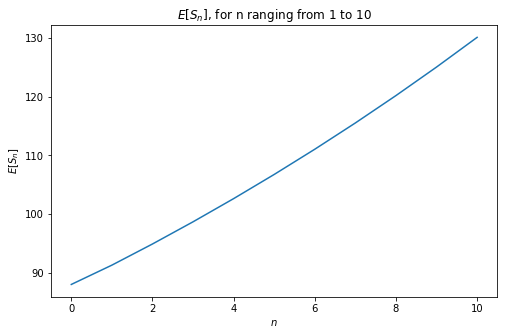

In [48]:
plt.figure(figsize=(8,5))
plt.plot(ESn_list)
plt.title('$E[S_n]$, for n ranging from 1 to 10')
plt.xlabel('$n$')
plt.ylabel('$E[S_n]$')
plt.show()

(b) Now simulate 6 paths of $S_t$ for *0 ≤ t ≤ 10* (defined in part (a)) by dividing up the interval [0, 10] into 1,000 equal parts.  

**Solution:**

Start with defining the parameters, *0 ≤ t ≤ 10* divide into 1000 equal parts will result is a 0.01 increment interval

In [49]:
dt = 10/1000
t = list(map(lambda x: x/100, range(1, 1001)))

The returns of the stock will follow geometric brownian $dS_t = rdt + \sigma dW_t$, which could be simulated as $dS_t = rdt + \sigma \sqrt{dt}Z$.

Generate 6000 random normal numbers and slice into 6 parts

In [50]:
# Generate 6000 random normal number pairs, only choose one of them
Z6 = generate_normal(7, 6000)[0]

# slice into 6 parts 
split_points= list(range(0, 6000, 1000))
Z_list = [Z6[i: i + 1000] for i in split_points]

Simulate returns of the stock for 6 different paths

In [51]:
r_St = [list(map(lambda z: r*dt + sd*m.sqrt(dt)*z, Z_list[i])) for i in range(len(Z_list))]

Build a function that converts the returns of stock to stock prices

In [52]:
def stock_prices(r_St, t):
    """ convert stock returns to stock price
    """
    St = [S0]
    for i in range(1, len(r_St) + 1):
        St.append(St[i - 1]*m.exp(r_St[i - 1]))
    St = list(zip(t, St))
    return St

In [53]:
stock_paths = [stock_prices(r_St[i], t) for i in range(len(r_St))]

(c) Plot your data from parts (a) and (b) in one graph

**Solution:**

Plot the 6 paths of the simulated stock prices and the expected stock prices

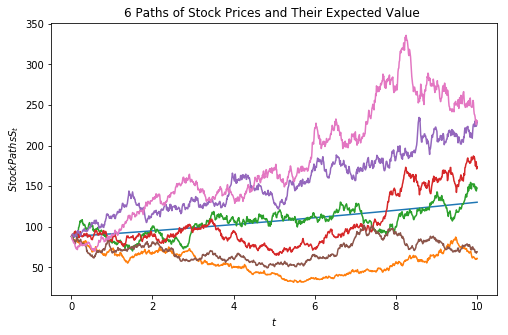

In [54]:
plt.figure(figsize=(8,5))
plt.plot(ESn_list)
for i in stock_paths:
    plt.plot(*zip(*i))
plt.title('6 Paths of Stock Prices and Their Expected Value ')
plt.xlabel('$t$')
plt.ylabel('$Stock Paths S_t$')
plt.show()

(d) What would happen to the $E[S_n]$ graph if you increased $\sigma$ from 18% to 35%? What would
happen to the 6 plots of $S_t$ for 0 ≤ 𝑡 ≤ 10, if you increased $\sigma$ from 18% to 35%?


**Solution:**

The graph for $E[S_n]$ should have no change at all. According to no arbitrage princinples, the expected value of the stock returns should be exactly the same as the returns of the bond market, which is equal to the risk free rate r. The expected stock price will equal to  $E[S_n] = S_0 e^{rn}$, which has nothing to do with the volitality $\sigma$. The emprical expectation of stock prices for 10 periods are very close to the level before volitality change.

In [55]:
# define new paramenters
S0 = 88
r = 0.04
sd_new = 0.35

In [56]:
ESn_list_new =  [S0] + list(map(lambda t: expected_stock_value(sd_new, t), n))

On the other hand, if $\sigma$ is increased from 18% to 35%, more flucturation will be present in the paths, as brownian motion's distribution at each point in time depends on the volitality supplied

In [57]:
r_St_new = [list(map(lambda z: r*dt + sd_new*m.sqrt(dt)*z, Z_list[i])) for i in range(len(Z_list))]

In [58]:
stock_paths_new = [stock_prices(r_St_new[i], t) for i in range(len(r_St))]

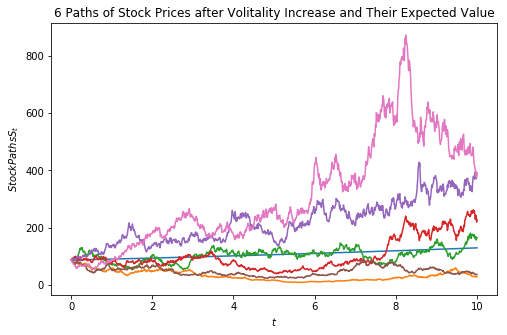

In [59]:
plt.figure(figsize=(8,5))
plt.plot(ESn_list_new)
for i in stock_paths_new:
    plt.plot(*zip(*i))
plt.title('6 Paths of Stock Prices after Volitality Increase and Their Expected Value')
plt.xlabel('$t$')
plt.ylabel('$Stock Paths S_t$')
plt.show()

## Question 6

Consider the following integral for computing the number 𝜋: $4\int^{1}_{0}\sqrt{1 - x^2}dx = \pi$

(a) The integral above can be estimated by a simple numerical integration using, say Euler’s discretization (or any other discretization) scheme.   Estimate the integral by using the Euler’s discretization scheme.  

**Solution:**

The Euler's Method is the method that recurrsively linearly estimating the entire function value with the previous value

Set the step size to be 0.01, there will be 1000 steps in total.

$$y(t+\Delta_t) = y(t) + y'(t)\cdot \Delta t$$

Where $y(t) = \int^t_0\sqrt{1 - x^2}$, $0 \leq t \leq 1$

Find the derivative of function y

$$y' = \frac{d}{dt}(\int^t_0\sqrt{1 - x^2}) = \sqrt{1 - t^2}$$

Then we could build a list of change in values of y (named $I$) and find the cumulative sum of the list, start with 0 (since $\int^0_0\sqrt{1 - x^2} = 0$)

In [60]:
# build a list of change in function y
n = 1000 # number of steps
I = [0]  # list of Euler integral values
dt = 1/n # step size

t = list(map(lambda t: t*dt, range(int(n + 1))))

for i in range(1, len(t)):
    I.append(I[i-1] + m.sqrt(1-t[i-1]**2)*dt)   

The estimated value of function y is stored as the last value of the $I$ list, and the value of the intergral $4\int^{1}_{0}\sqrt{1 - x^2}dx$ is 4 times of the function of value y

In [61]:
estimated_y = I[-1]
integral = 4 * estimated_y
print ("The integral estimated by Euler's Method:", integral)

The integral estimated by Euler's Method: 3.143555466911028


(b) Estimate the integral by Monte Carlo simulation

**Solution:**

Generate 1000 uniform random numbers

In [62]:
rand2 = generate_random_sequence(9, 1000)
U = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand2))

Evaluate the function $f(x) = 4\sqrt{1 - x^2}$ and take the average of the results of evaluation

In [63]:
integral_mc = sum(map(lambda u: 4*m.sqrt(1-u**2), U))/len(U)
print("The integral estimated by Monte Carlo Simulation Method:", integral_mc)

The integral estimated by Monte Carlo Simulation Method: 3.1480716328273215


(c) Now try the Importance Sampling method to improve the estimate of $\pi$ in part (b). Comment on errors and improvements

**Solution:**

let $t(x) = \frac{1 - ax^2}{1 - \frac{a}{3}}$, where a = 0.74

define $g(x) = maximum\ of\ t(x)$, therefore $g(x) = max(\frac{1 - 0.74x^2}{1 - \frac{0.74}{3}})$

g(x) takes maximum value when x = 0, g(x) will be a constant number

In [64]:
# define g(x)
g = 1 / (1- (0.74/3))

In [65]:
# define h(x)
t = lambda x: (1 - 0.74*x**2)/(1- 0.74/3) if 0 <= x <= 1 else 0

Use acceptance rejection method, generate 1000 samples of X, following density function $h(x) = Uniform(0,1)$

Generate another 1000 samples of $U$~$U(0, 1)$ that is independent of X. For simplicity, use numpy built in function to generate random uniforms

In [66]:
def accept_reject(n):
    """
        Generate sample of X with acceptance-rejection method
    """
    np.random.seed(9)
    sample = []
    while n > 0:
        # generate sample for U
        u = np.random.uniform(0, 1)
        # generate sample of Y
        y = np.random.uniform(0, 1)
        
        if u <= t(y)/g:
            sample.append(y)
            n -= 1
        else:
            pass
    return sample

Use the generated sample to evaluate $f(x) = 4\sqrt{1 - x^2}$ and take the average of the results of evaluation

In [67]:
sample = accept_reject(1000)
integral_importance = sum(map(lambda x: 4*m.sqrt(1-x**2)/t(x), sample))/len(sample)

In [68]:
print("The integral estimated by Monte Carlo Simulation Method:", integral_importance)

The integral estimated by Monte Carlo Simulation Method: 3.143273475357075


The accuracy of estimation improved a little, now compute the standard deviation before and after importance sampling is applied

In [69]:
pi_seq = list(map(lambda u: 4*m.sqrt(1-u**2), U))
pi_seq2 = list(map(lambda x: 4*m.sqrt(1-x**2)/t(x), sample))

pi_sd_before = m.sqrt(sum(map(lambda p: (p - integral_mc)**2 , 
                             pi_seq))/len(pi_seq))

pi_sd_after =  m.sqrt(sum(map(lambda p: (p - integral_importance)**2 , 
                             pi_seq2))/len(pi_seq2))

In [70]:
print("Before variance reduction:\n")
print("Standard deviation of the integral Monte Carlo Simulation: ", round(pi_sd_before, 5))
print('\n')
print("After variance reduction:\n")
print("Standard deviation of call price Monte Carlo Simulation: ", round(pi_sd_after, 5))

Before variance reduction:

Standard deviation of the integral Monte Carlo Simulation:  0.88963


After variance reduction:

Standard deviation of call price Monte Carlo Simulation:  0.20842


**Comment:** The accuracy improved as the estimated value is closer to the true value. The standard deviation is also reduced as well